# Exercice Titanic : Quels passagers a la plus de chance de survivre ?

## Importation des libraries : 

In [268]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Premiere manipulation des datas :

In [269]:
train_dfo = pd.read_csv('data/train.csv')
test_dfo = pd.read_csv('data/test.csv')

In [270]:
train_dfo.shape

(891, 12)

In [271]:
train_dfo.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [272]:
train_dfo.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [273]:
print(train_dfo['Pclass'].unique())

[3 1 2]


In [274]:
print(train_dfo['Survived'].unique())

[0 1]


In [275]:
print (train_dfo['Age'].min(), train_dfo['Age'].max())

0.42 80.0


In [276]:
train_dfo.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Nettoyages des données :

In [277]:
''' df['Sex'].replace({
    "male": 0,
    "female": 1
}, inplace=True) 
'''

# using one hot encoding methode with get_dummies
train_df = pd.get_dummies(train_dfo, columns=['Sex'], drop_first=True)
print(train_df.head())

test_df = pd.get_dummies(test_dfo, columns=['Sex'], drop_first=True)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin Embarked  Sex_male  
0         A/5 21171   7.2500   NaN        S      True  
1          PC 17599  71.2833   C85        C     False  
2  STON/O2. 3101282   7.9250   NaN        S     False  
3            113803  53.1000  C123        S     False  
4            373450   8.0500   NaN        S   

In [278]:
train_df = train_df.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'])
test_df = test_df.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'])

In [279]:
miss_va = train_df.isnull().sum()/len(train_df)
print(miss_va)

miss_va_test = test_df.isnull().sum()/len(test_df)
print(miss_va_test)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Fare           0.000000
Sex_male       0.000000
dtype: float64
PassengerId    0.000000
Pclass         0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Fare           0.002392
Sex_male       0.000000
dtype: float64


In [280]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_male     891 non-null    bool   
dtypes: bool(1), float64(2), int64(5)
memory usage: 49.7 KB


In [281]:
def count_survivor(df):
    survivant = 0
    for i in range(len(df)):
        if df['Survived'][i] == 1:
            survivant += 1
    return survivant

print(count_survivor(train_df))

342


## Visualisations et analyses :

### Matrice de correlation : 

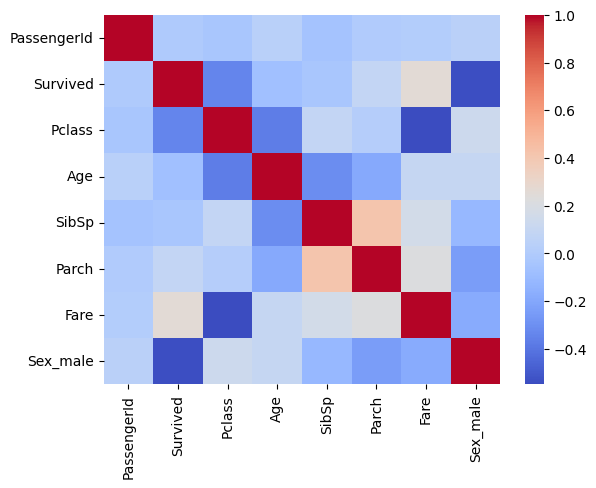

In [282]:
#df_num = df.select_dtypes(include=[np.number])
df_corr = train_df.corr()
sns.heatmap(df_corr, cmap='coolwarm')
plt.show()

### Lien entre les survivants et leurs classes : 

In [283]:
count_class = train_df['Pclass'].value_counts()
print(count_class)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


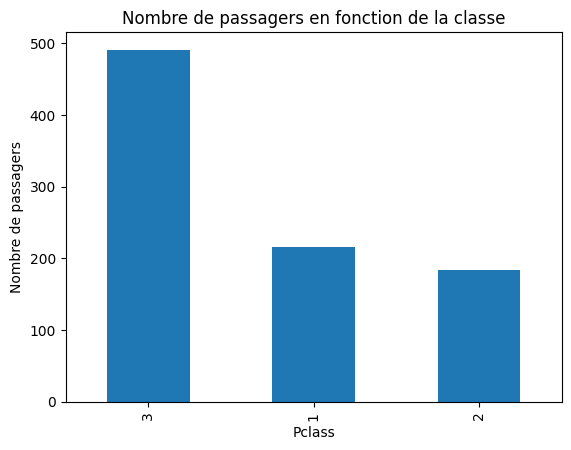

In [284]:
count_class.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Nombre de passagers')
plt.title('Nombre de passagers en fonction de la classe')
plt.show()

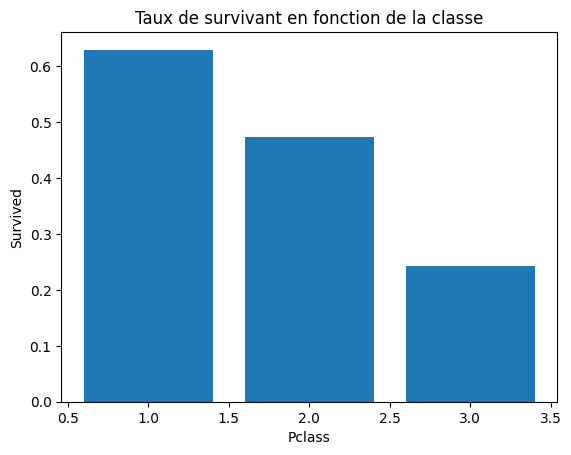

In [285]:
# affichage des survivants en fonction de la classe
gp1 = train_df.groupby('Pclass').mean()['Survived']
plt.bar(gp1.index, gp1.values)
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.title('Taux de survivant en fonction de la classe')
plt.show()

Analyse : 
- Plus de personnes qui ont survecu en etant dans la classe 1, suivie de la 2, puis de la 3
- Initialement, il y avait un plus grand nombre de personne dans la classe 3
- La classe 1 est la plus chere

### Lien entre les survivants et leurs sexes : 

<Axes: xlabel='Sex_male'>

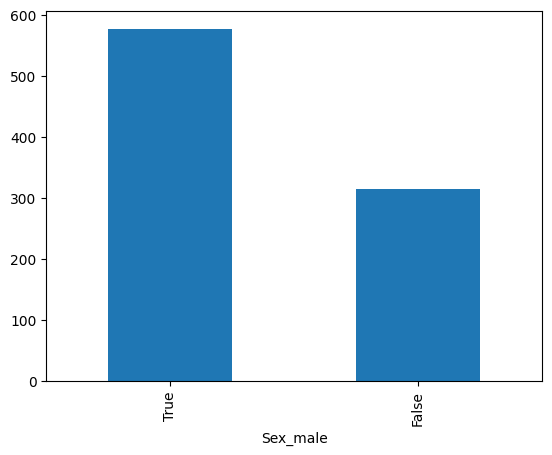

In [286]:
train_df['Sex_male'].value_counts().plot(kind='bar')

In [287]:
print("Nombre d'hommes :", (train_df['Sex_male']==True).sum())
print("Nombre de femmes :", (train_df['Sex_male']==False).sum())

Nombre d'hommes : 577
Nombre de femmes : 314


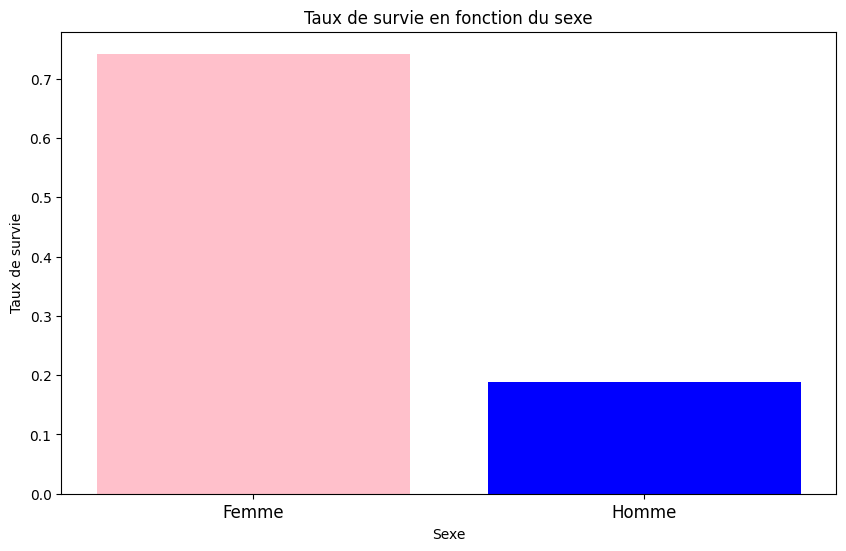

In [288]:
plt.figure(figsize=(10,6)) 
gp = train_df.groupby('Sex_male').mean()['Survived']
plt.bar(gp.index, gp.values, color=['pink', 'blue'])  # Ajouter des couleurs pour distinguer les sexes
plt.xlabel('Sexe') 
plt.ylabel('Taux de survie')  
plt.title('Taux de survie en fonction du sexe')  
plt.xticks(ticks=[0,1], labels=['Femme', 'Homme'], fontsize=12)  # Modifier les étiquettes de l'axe des x
plt.show()

In [289]:
gpF = train_df[train_df['Sex_male'] == False]['Survived'].mean()
print("taux de survie des femmes : ",gpF)
gpH = train_df[train_df['Sex_male'] == True]['Survived'].mean()
print("taux de survie des hommes : ",gpH)

taux de survie des femmes :  0.7420382165605095
taux de survie des hommes :  0.18890814558058924


Analyses : 
- Nombre d'homme a bord plus important que le nombre de femme
- Le taux de survie des femmes est plus élevé

### Lien entre les survivants et leurs ages : 

Text(0.5, 1.0, "Nombre de passagers en fonction de l'age")

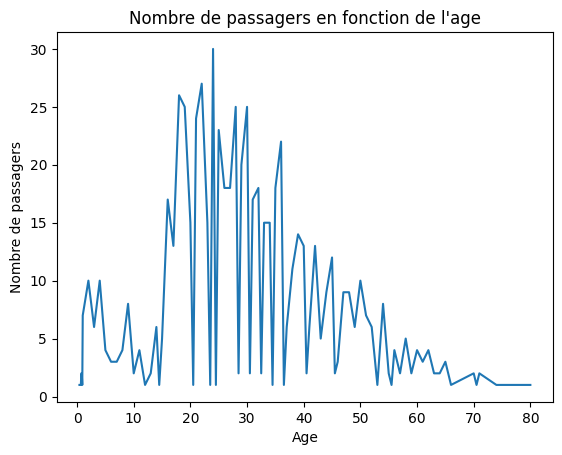

In [290]:
age = train_df['Age']
age= age.value_counts().sort_index()
plt.plot(age)
plt.xlabel('Age')
plt.ylabel('Nombre de passagers')
plt.title('Nombre de passagers en fonction de l\'age')

Text(0.5, 1.0, 'Nombre de passagers par age')

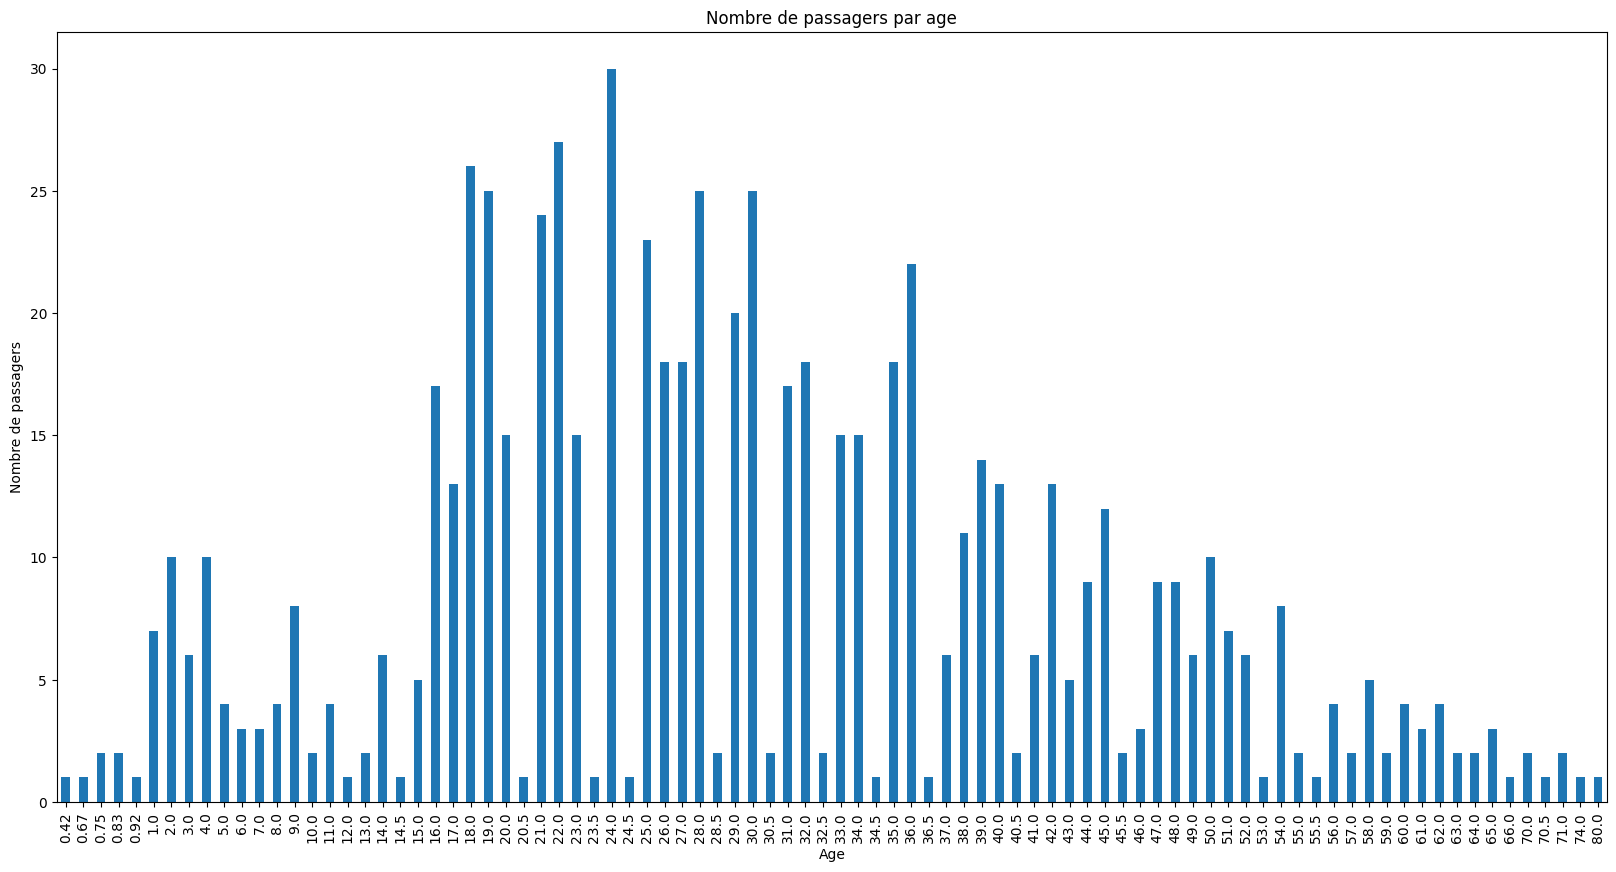

In [291]:
age.plot.bar(figsize=(20,10))
plt.xlabel('Age')
plt.ylabel('Nombre de passagers')
plt.title('Nombre de passagers par age')

Text(0.5, 1.0, "Taux de survie en fonction de l'age")

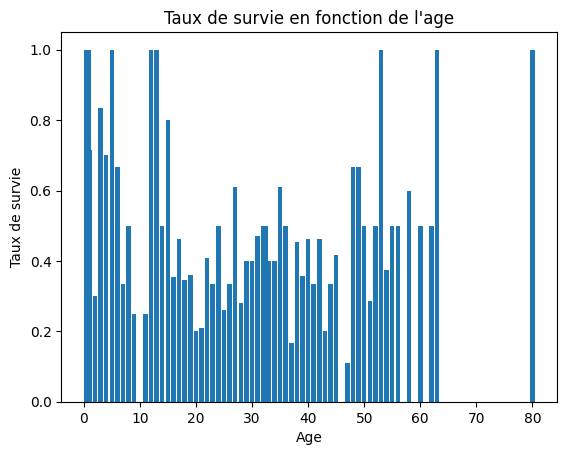

In [292]:
gpAge = train_df.groupby('Age').mean()['Survived']
plt.bar(gpAge.index, gpAge.values)
plt.xlabel('Age')
plt.ylabel('Taux de survie')
plt.title('Taux de survie en fonction de l\'age')

In [293]:
print("Le taux de survie des", (train_df['Age'] < 18).sum() , "enfants de moins de 18 ans est de ",train_df[train_df['Age']<18].mean()['Survived'], "soit", train_df[train_df['Age']<18].sum()['Survived'], "survivants")

Le taux de survie des 113 enfants de moins de 18 ans est de  0.5398230088495575 soit 61.0 survivants


### Tableaux regroupants ces infos :

In [294]:
print(train_df.groupby(['Pclass', 'Sex_male']).mean()['Survived'])
print("legende : False = Femme, True = Homme")

Pclass  Sex_male
1       False       0.968085
        True        0.368852
2       False       0.921053
        True        0.157407
3       False       0.500000
        True        0.135447
Name: Survived, dtype: float64
legende : False = Femme, True = Homme


In [295]:
print(train_df[train_df['Age']<18].groupby(['Pclass', 'Sex_male']).mean()['Survived'])
print("legende : False = Femme, True = Homme")

Pclass  Sex_male
1       False       0.875000
        True        1.000000
2       False       1.000000
        True        0.818182
3       False       0.542857
        True        0.232558
Name: Survived, dtype: float64
legende : False = Femme, True = Homme


## Modification de valeurs :

In [296]:
# afficher le nombre de valeurs manquantes dans chaque colonne
def count_missing_values(df):
    return df.isnull().sum()

count_missing_values(train_df)

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
Sex_male         0
dtype: int64

Utilisation d'estimateur pour les valeurs nan de l'age

In [297]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    
    def fit (self, X, y=None):
        return self
    def transform(self, X, y=None):
        imputer = SimpleImputer(strategy='mean')
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

age_imputer = AgeImputer()
train_df = age_imputer.transform(train_df)
test_df = age_imputer.transform(test_df)

In [298]:
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,1,0,3,22.0,1,0,7.2500,True
1,2,1,1,38.0,1,0,71.2833,False
2,3,1,3,26.0,0,0,7.9250,False
3,4,1,1,35.0,1,0,53.1000,False
4,5,0,3,35.0,0,0,8.0500,True


In [299]:
train_df = train_df.drop(columns=['Fare'])
test_df = test_df.drop(columns=['Fare'])

In [300]:
print(count_missing_values(train_df))
print(count_missing_values(test_df))

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Sex_male       0
dtype: int64
PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Sex_male       0
dtype: int64


## Modele de regression logistique
predire les survivants

In [301]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


### Les données d'entraînement :

In [302]:
X_train = train_df.drop(columns=['Survived'])
y_train = train_df['Survived']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [303]:
# entrainement du modèle
model = LogisticRegression()
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [304]:
# evaluation
mse = mean_squared_error(y_val, y_val_pred)
print(f'Erreur quadratique moyenne (MSE) sur l\'ensemble de validation : {mse}')


Erreur quadratique moyenne (MSE) sur l'ensemble de validation : 0.22905027932960895


In [305]:
# accuracy
print(accuracy_score(y_val, y_val_pred))

0.770949720670391


In [306]:
#plot
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_val_pred)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)


88 17 24 50


- Valeurs réelles (y_val) : Les étiquettes de l'ensemble de validation.
- Valeurs prédites (y_val_pred) : Les prédictions faites par le modèle sur l'ensemble de validation.

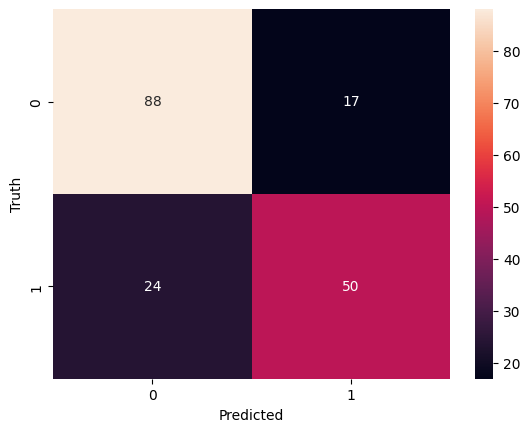

In [307]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Les données de test :

In [308]:
X_test = test_df
y_test = model.predict(X_test)

In [314]:
# Prédictions sur les données de test
y_test_pred = model.predict(X_test)

In [316]:
# Sauvegarde des prédictions dans un fichier CSV
output = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_test_pred})
output.to_csv('submission1.csv', index=False)

print("Les prédictions ont été sauvegardées dans le fichier submission1.csv")

Les prédictions ont été sauvegardées dans le fichier submission1.csv


## Random forest

In [317]:
from sklearn.ensemble import RandomForestClassifier

y = train_dfo["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Age"]
X_train = pd.get_dummies(train_dfo[features])
X_test = pd.get_dummies(test_dfo[features])

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Define the model with specified parameters
model = RandomForestClassifier(n_estimators=150, max_depth=4, random_state=1) 
model.fit(X_train, y)  # Train the model
predictions = model.predict(X_test)

In [318]:
output = pd.DataFrame({'PassengerId': test_dfo.PassengerId, 'Survived': predictions})
output.to_csv('submission2.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Comparaison des deux modèles

In [320]:
df1 = pd.read_csv('submission1.csv')
df2 = pd.read_csv('submission2.csv')

In [321]:
# Fusionner les deux DataFrames sur 'PassengerId'
merged_df = pd.merge(df1, df2, on='PassengerId', suffixes=('_mod1', '_mod2'), how='inner')

In [322]:
merged_df.head()

,PassengerId,Survived_mod1,Survived_mod2
0,892,0,0
1,893,1,1
2,894,0,0
3,895,0,0
4,896,1,1


In [325]:
# Filtrer pour obtenir uniquement les lignes où les prédictions diffèrent
different_survival_counts = (merged_df['Survived_mod1'] != merged_df['Survived_mod2']).sum()

# Afficher les PassengerId avec des résultats différents
print(different_survival_counts)

0


Les deux modèles ont visiblement prédit exactement les mêmes résultats pour tous les passagers.